# ENSEMBLE METHODS PART 1 

## CONTENTS

__1.INTRODUCTION__

__2.LIBRARIES AND DATA__
       
__3.PREPROCESSING__

__4.BAGGING__
             
__5.RANDOM FOREST__

__6.RESULTS__


## 1. INTRODUCTION

In this Jupyter Notebook, we'll make use of the ensemble methods Bagging and Random Forest.

## 2. LIBRARIES AND DATA

__Libraries__

In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

__Importing data__

In [2]:
data1 = pd.read_csv("train_dataset.csv") 
data2 = pd.read_csv("test_dataset.csv") 

# Train and test Dataset
train_df = data1.copy()
test_df = data2.copy()

In [3]:
train_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,245.0,95,196.0,535.2,46870,33642,14.4,0.0,46611.30,42.0,40.4,44.3,2.31,51.1,17.2,43.0,4.7,44.1,9.6,54.6,5.4,70.2,46.0,38.5,19.5,96.374269,1.684211,0.526316,0.181287,47.898380,4.048468,0,0
1,241.0,112,182.4,408.4,36424,41459,18.8,0.0,35815.95,45.8,44.9,46.7,2.47,55.0,22.0,43.5,3.2,37.2,11.6,47.7,9.2,52.4,28.7,44.9,23.5,66.207829,0.304282,1.144679,1.113285,52.937625,4.550419,0,0


In [4]:
test_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,104.0,46,170.4,401.9,38504,22633,21.5,0.0,38888.25,34.0,32.6,35.6,2.28,43.1,4.9,13.0,5.8,33.6,14.1,51.8,8.4,65.3,43.2,35.9,19.1,73.337436,23.915432,0.835128,0.492286,44.130860,3.697749,0,0
1,20.0,10,187.4,400.6,43883,3091,12.1,0.0,43962.70,49.5,47.7,50.5,2.21,61.0,11.9,14.8,14.2,42.3,10.0,62.2,3.1,75.6,44.3,35.3,14.8,97.907950,1.223045,0.193112,0.418410,53.957879,7.992565,0,0


## 3. PREPROCESSING

In [5]:
# Defining kfold validation
cv = KFold(n_splits=5) 

In [6]:
# Defining X_train, Y_train, X_test, Y_test
X_train = train_df.drop(columns = 'TARGET_deathRate')
Y_train = train_df[ 'TARGET_deathRate']

X_test = test_df.drop(columns = 'TARGET_deathRate')
Y_test = test_df[ 'TARGET_deathRate']

# Creating lists with the columns names
cols = X_train.columns

# Scaling the Xs
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

# Creating Dataframes
X_train = pd.DataFrame(X_train_sc, columns=cols)
X_test = pd.DataFrame(X_test_sc, columns=cols)

In [7]:
X_train.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,-0.271292,-0.096338,1.668508,0.208378,-0.240801,-0.491120,-0.313034,0.077867,0.167429,0.104674,0.338603,-0.333879,-0.126548,-0.164616,0.832046,-0.243324,1.263284,-0.619932,0.150399,-0.733139,0.654095,0.671201,0.201664,-0.014851,0.752912,-0.490384,-0.268433,-0.505071,-0.568648,-0.796973,-0.800617,-0.376979
1,-0.278109,0.012097,-0.745916,-0.957016,-0.147741,0.268412,-0.313034,-0.820140,0.891139,0.952944,0.789650,0.035530,0.467398,0.414138,0.886482,-0.609210,0.213044,-0.188110,-0.717923,0.382208,-1.136868,-1.334959,1.095785,0.700492,-1.229780,-0.590300,0.164841,-0.214382,0.272010,-0.549130,-0.800617,-0.376979


In [8]:
X_test.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,-0.535776,-0.482357,-0.811309,-0.695418,-0.423052,0.711498,-0.430235,-0.549236,-1.543721,-1.584673,-1.433122,-0.435373,-1.342823,-1.828754,-2.534765,-0.080493,-0.278430,0.236317,-0.256114,0.259405,0.096920,0.289552,-0.193297,-0.097635,-0.710776,1.043995,-0.071135,-0.340946,-1.173046,-1.041237,-0.805387,-0.43617
1,-0.691452,-0.723055,-0.835777,-0.166677,-0.658396,-0.803441,-0.430235,-0.171898,1.565093,1.453400,1.471794,-0.614601,1.305114,-0.870298,-2.331803,1.936349,1.072236,-0.582000,1.000732,-1.308176,1.098895,0.412094,-0.273350,-0.809507,0.825977,-0.518157,-0.324313,-0.361411,0.493556,1.455234,-0.805387,-0.43617


## 4. BAGGING

In [9]:
# Defining Grid for GridSearchCV

grid = {'base_estimator': [DecisionTreeRegressor(), LinearRegression(), KNeighborsRegressor()], 
        'n_estimators': [10,20,30],
        'max_samples': np.arange(0.1,0.5,0.2),
        'max_features': np.arange(0.1,0.5,0.2),
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]}

In [10]:
# Instantiating GridSearchCV 

Bagging_search = GridSearchCV(BaggingRegressor(random_state = 126), 
                            grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose = 1)

In [11]:
# Searching for the best parameters 

CV_Bagging_results = Bagging_search.fit(X_train, Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [12]:
# Displaying the best parameters 

Bagging_Best_Parameters = pd.DataFrame(CV_Bagging_results.best_params_,
                                       index = ['Best Bagging Regression Parameters'])

Bagging_Best_Parameters = Bagging_Best_Parameters.transpose()
Bagging_Best_Parameters

,Best Bagging Regression Parameters
base_estimator,DecisionTreeRegressor()
bootstrap,False
bootstrap_features,False
max_features,0.3
max_samples,0.3
n_estimators,30


In [13]:
# Storing the values of the best parameters

best_estimator = CV_Bagging_results.best_params_['base_estimator']
best_n_estimators = CV_Bagging_results.best_params_['n_estimators']
best_max_samples = CV_Bagging_results.best_params_['max_samples']
best_max_features = CV_Bagging_results.best_params_['max_features']
best_bootstrap = CV_Bagging_results.best_params_['bootstrap']
best_bootstrap_features = CV_Bagging_results.best_params_['bootstrap_features']

In [14]:
# Instantiating the best 

BaggingModel = BaggingRegressor(random_state = 126,
                                 base_estimator = best_estimator,
                                 n_estimators = best_n_estimators, 
                                 max_samples = best_max_samples, 
                                 max_features = best_max_features,
                                 bootstrap = best_bootstrap,
                                 bootstrap_features = best_bootstrap_features).fit(X_train,Y_train)

In [15]:
# Getting the R^2

Bagging_R2 = np.round(BaggingModel.score(X_train,Y_train),3)

In [16]:
# Getting predictions and training MSE 

BaggingPredictions = BaggingModel.predict(X_train)
Bagging_Training_MSE = np.round(mean_squared_error(Y_train, BaggingPredictions),2)

In [17]:
# Getting kfold MSE 

bagging_cv_MSE = round(np.mean(cross_val_score(BaggingModel, X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)

In [18]:
# Getting predictions and test MSE 

BAGGING_predictions = BaggingModel.predict(X_test)
BAGGING_Test_MSE = round(mean_squared_error(Y_test, BAGGING_predictions), 2)

In [19]:
# Dictionary that holds the performance metrics 

dict1 = {'Bagging': (np.round(Bagging_R2,3), Bagging_Training_MSE,
                                            bagging_cv_MSE, BAGGING_Test_MSE )}

In [20]:
# Creating a dataframe to easily present the results 

Evaluation_df = pd.DataFrame(dict1, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

In [21]:
# Displaying the metrics

Evaluation_df

,Bagging
R^2,0.71
Training_MSE,209.44
Training_MSE (KFold),410.70
Test_MSE,341.32


## 5. RANDOM FOREST

In [22]:
# Redefining the X_train, Y_train, X_test, Y_test
X_train = train_df.drop(columns = 'TARGET_deathRate')
Y_train = train_df[ 'TARGET_deathRate']

X_test = test_df.drop(columns = 'TARGET_deathRate')
Y_test = test_df[ 'TARGET_deathRate']

In [23]:
# Defining Grid for GridSearchCV

grid = { 'n_estimators': [10,20,30],
        'max_depth' : [2,4,6,None],
        'min_samples_split' : [2,4,6],
        'min_samples_leaf' : [2,4,6],
        'max_features' : ['sqrt', None, 0.35],
        'max_leaf_nodes' : [2,4,6],
        'bootstrap': [True, False]}

In [24]:
# Instantiating GridSearchCV 

RF_search = GridSearchCV(RandomForestRegressor(random_state = 126), 
                         grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose = 1)

In [25]:
# Searching for the best parameters 

CV_RF_results = RF_search.fit(X_train, Y_train)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


In [26]:
# Displaying the best parameters 

RF_Best_Parameters = pd.DataFrame(CV_RF_results.best_params_,
                                  index = ['Best Random Forest Regression Parameters'])

RF_Best_Parameters = RF_Best_Parameters.transpose()
RF_Best_Parameters

,Best Random Forest Regression Parameters
bootstrap,True
max_depth,4
max_features,0.35
max_leaf_nodes,6
min_samples_leaf,6
min_samples_split,2
n_estimators,30


In [27]:
# Storing the values of the best parameters

best_n_estimators = CV_RF_results.best_params_['n_estimators']
best_max_depth = CV_RF_results.best_params_['max_depth']
best_min_samples_split = CV_RF_results.best_params_['min_samples_split']
best_min_samples_leaf = CV_RF_results.best_params_['min_samples_leaf']
best_max_features = CV_RF_results.best_params_['max_features']
best_bootstrap = CV_RF_results.best_params_['bootstrap']
best_max_leaf_nodes = CV_RF_results.best_params_['max_leaf_nodes']


In [28]:
# Instantiating the best model

RandomForestModel = RandomForestRegressor(random_state = 126,
                                 max_depth = best_max_depth,
                                 n_estimators = best_n_estimators, 
                                 min_samples_split = best_min_samples_split, 
                                 min_samples_leaf = best_min_samples_leaf,
                                 bootstrap = best_bootstrap,
                                 max_leaf_nodes = best_max_leaf_nodes,
                                          max_features = best_max_features).fit(X_train,Y_train)

In [29]:
# Getting the R^2

RF_R2 = np.round(RandomForestModel.score(X_train,Y_train),3)

In [30]:
# Getting predictions and training MSE 

RFPredictions = RandomForestModel.predict(X_train)
RF_Training_MSE = np.round(mean_squared_error(Y_train, RFPredictions),2)

In [31]:
# Getting kfold MSE 

rf_cv_MSE = round(np.mean(cross_val_score(RandomForestModel, X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)

In [32]:
# Getting predictions and test MSE 

RF_predictions = RandomForestModel.predict(X_test)
RF_Test_MSE = round(mean_squared_error(Y_test, RF_predictions), 2)

In [33]:
# Dictionary that holds the performance metrics 

dict2 = {'Random Forest': (np.round(RF_R2,3), RF_Training_MSE,
                                            rf_cv_MSE, RF_Test_MSE )}

In [34]:
# Creating a dataframe to easily present the results 

Evaluation_df1 = pd.DataFrame(dict2, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

In [35]:
# Displaying the metrics

Evaluation_df1

,Random Forest
R^2,0.40
Training_MSE,433.72
Training_MSE (KFold),456.70
Test_MSE,375.03


## 6. RESULTS

__Aggragated Results__

In [36]:
Ensemble_Models_Part1_Results = pd.concat([Evaluation_df, Evaluation_df1], axis = 1)
Ensemble_Models_Part1_Results

,Bagging,Random Forest
R^2,0.71,0.40
Training_MSE,209.44,433.72
Training_MSE (KFold),410.70,456.70
Test_MSE,341.32,375.03


__Residuals's Plots__

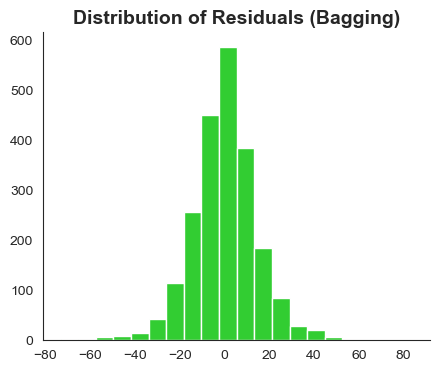

In [37]:
residuals_bagging = BaggingPredictions - Y_train 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_bagging, bins = 20, color = "limegreen")
    
plt.title(label = "Distribution of Residuals (Bagging)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

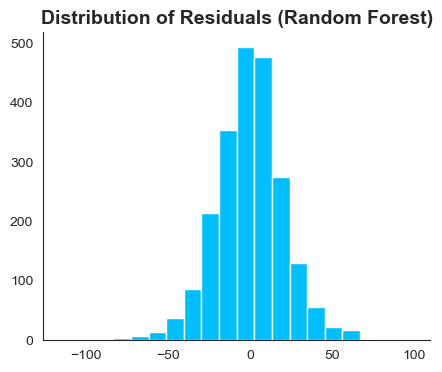

In [38]:
residuals_rf = RFPredictions - Y_train 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_rf, bins = 20, color = "deepskyblue")
    
plt.title(label = "Distribution of Residuals (Random Forest)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

It appears that the Bagging Regressor overfits the data, as evidenced by the small training error but significantly greater test error. On the other hand, the Random Forest Regression seems to encounter challenges in accurately predicting both the training and test data.

__Saving the Results__

In [39]:
Ensemble_Models_Part1_Results.to_csv(r'Ensemble_Models_Part1_Results.csv', index=True, 
                                              index_label= 'Metrics')